2. <br /> 
    a. Design a single unit perceptron for classification og linearly separable binary dataset without using pre-defined models. Use the perceptron from sklearn. <br />
    b. Identify the problems in single unit perceptron using AND, OR, XOR data and analyze the results.

Accuracy: 100.00%


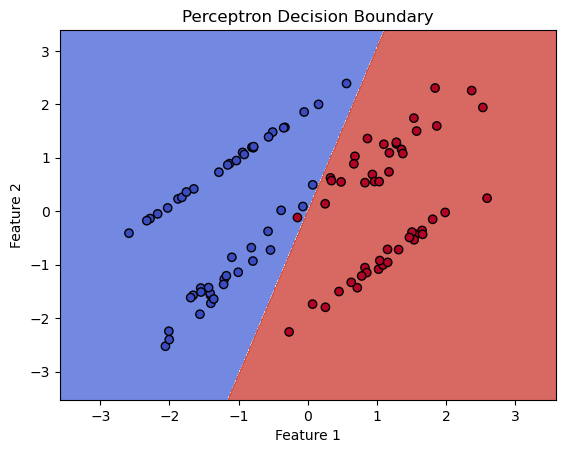

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a linearly separable binary dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Perceptron
model = Perceptron(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)

# Evaluate and print accuracy
accuracy = model.score(X_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()

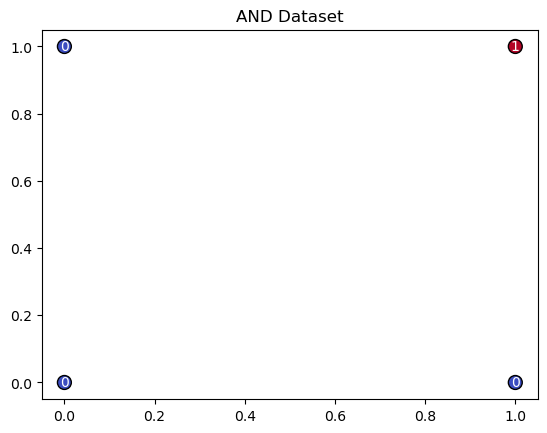

AND Accuracy: 100.00%



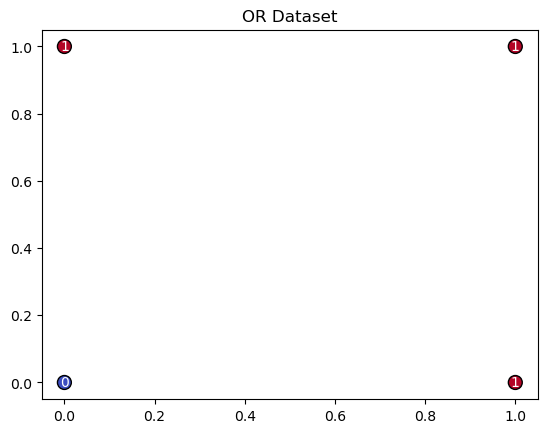

OR Accuracy: 100.00%



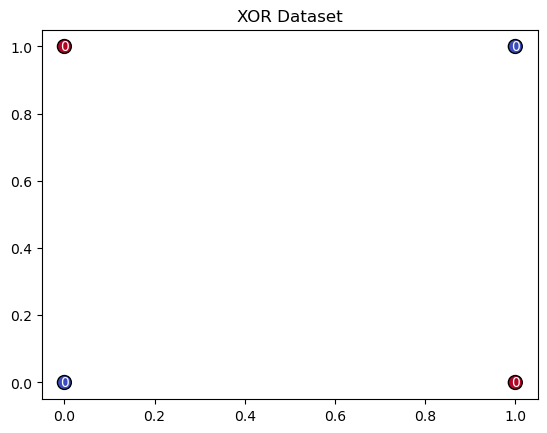

XOR Accuracy: 50.00%



In [21]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

# Define the datasets
datasets = {
    "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
    "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
    "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
}

# Function to train and evaluate the perceptron
def train_and_evaluate(X, y, title):
    perceptron = Perceptron(max_iter=1000, eta0=1, random_state=0).fit(X, y)
    predictions = perceptron.predict(X)
    
    # Plot data and predictions
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    for i, pred in enumerate(predictions):
        plt.text(X[i, 0], X[i, 1], str(pred), color='white', ha='center', va='center')
    plt.title(f'{title} Dataset')
    plt.show()
    
    print(f'{title} Accuracy: {np.mean(predictions == y) * 100:.2f}%\n')

# Evaluate datasets
for name, (X, y) in datasets.items():
    train_and_evaluate(X, y, name)
